#### Hello World of Machine Learning - Classification of Iris Flowers
This is a good project because it is so well understood.

* Attributes are numeric so you have to figure out how to load and handle data.
* It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
* It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
* It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
* All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Iris

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#Importing load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url)

In [3]:
#Let us specify the column names
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.columns = col_names

#### Time to understand the dataset:

In [4]:
#Let us peek into our data
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [5]:
#Dimensions of the dataset
df.shape

(149, 5)

In [6]:
#Statistical summary of all attributes
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Class Distribution
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

We can see that each class has the same number of instances (50 or 33% of the dataset).

#### Data Visualization:

1. Univariate plots to better understand each attribute.

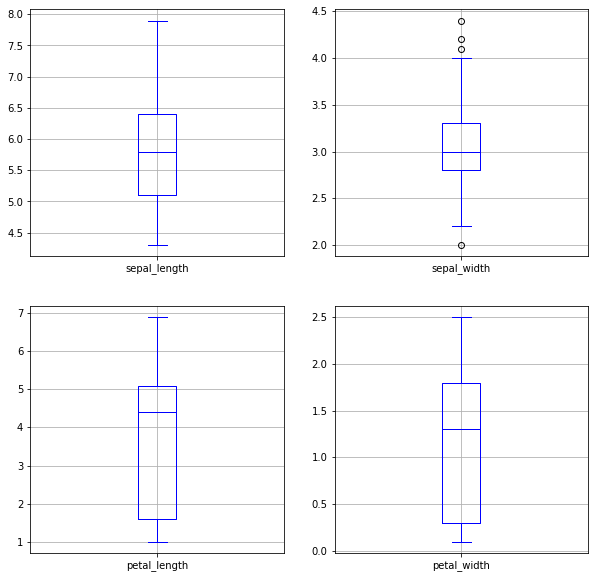

In [8]:
df.plot(kind = 'box', subplots = True, layout = (2,2), figsize = (10,10), 
        sharex = False, sharey = False,color='Blue', grid = True)
#plt.tick_params(color='red')
#plt.tick_params(axis='x', colors='red')
plt.show()

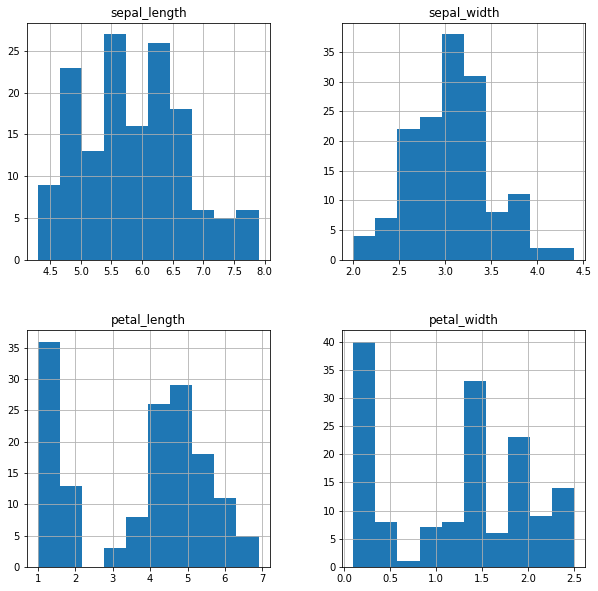

In [9]:
df.hist(figsize = (10,10))
plt.show()

2. Multivariate plots to better understand the relationships between attributes.

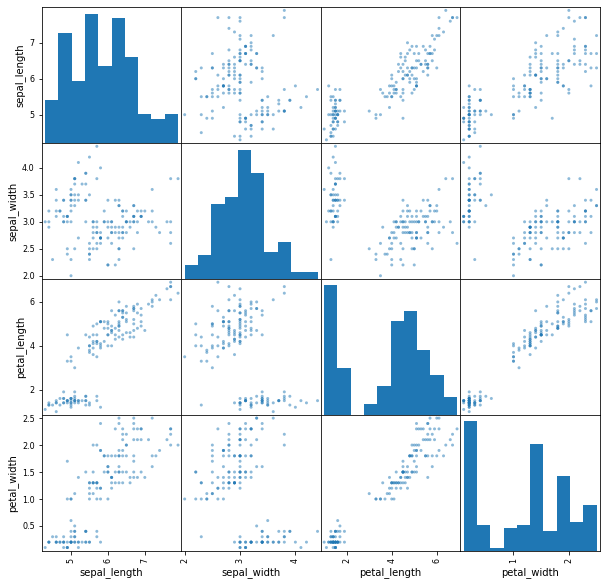

In [10]:
scatter_matrix(df, figsize = (10,10))
plt.show()

In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


This suggests a high correlation.

#### Create a Validation Dataset
We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [12]:
array = df.values
X = array[:,0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.2, random_state = 1) 

#### Building models

In [20]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s:  Mean:%f  SD:%f' % (name, cv_results.mean(), cv_results.std()))

LR:  Mean:0.940909  SD:0.075286
LDA:  Mean:0.975000  SD:0.053359
KNN:  Mean:0.958333  SD:0.055902
CART:  Mean:0.940909  SD:0.053761
NB:  Mean:0.958333  SD:0.076830
SVM:  Mean:0.975000  SD:0.053359


We see that `Linear Discriminant Analysis(LDA)` and `Support Vector Machines (SVM)` are performing best.

In [14]:
# plt.boxplot(results, labels=names)
# #plt.figsize = (30,30)
# plt.title('Algorithm Comparison')
# plt.tick_params(axis='y', colors='red')
# plt.tick_params(axis='x', colors='red')
# plt.show()

#### Making Predictions

We have to choose a model - Because LDA is a linear model let us try predicting using LDA.

In [15]:
model = LinearDiscriminantAnalysis()
#model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#### Evaluate Predictions

In [16]:
print(accuracy_score(Y_validation, predictions))
print('______________________________________')
print(confusion_matrix(Y_validation, predictions))
print('______________________________________')
print(classification_report(Y_validation, predictions))

1.0
______________________________________
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
______________________________________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

